# Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data 

**1.1 Load Each Countries Cleaned CSV**

In [3]:
print("\n Cross-Countries Comparison")
# The Cleaned Data Files path of Sirra Leone.
cleaned_file_path_sl = 'C:/Users/hp/OneDrive/Desktop/kaim-ai/KAIM/ML-based-solar-data-discoveries/data/sierraleone-bumbuna_clean.csv'
# The Cleaned Data Files path of Benin.
cleaned_file_path_bn = 'C:/Users/hp/OneDrive/Desktop/kaim-ai/KAIM/ML-based-solar-data-discoveries/data/benin-malanville_clean.csv' 
# The Cleaned Data Files path  of Togo. 
cleaned_file_path_tg = 'C:/Users/hp/OneDrive/Desktop/kaim-ai/KAIM/ML-based-solar-data-discoveries/data/togo-dapaong_qc_clean.csv'

# Load the cleaned data for Sierra Leone.
try:
    df_sl = pd.read_csv(cleaned_file_path_sl, parse_dates=['Timestamp'])
    print(f"Successfully loaded cleaned data for Sierra Leone from {cleaned_file_path_sl}")
except FileNotFoundError:
    print(f"Error: Cleaned data file not found at {cleaned_file_path_sl}. Please check the path.")
    exit()

# Load the cleaned data for Benin.
try:
    df_bn = pd.read_csv(cleaned_file_path_bn, parse_dates=['Timestamp'])
    print(f"Successfully loaded cleaned data for Benin from {cleaned_file_path_bn}")
except FileNotFoundError:
    print(f"Error: Cleaned data file not found at {cleaned_file_path_bn}. Please check the path.")
    exit()
# Load the cleaned data for Togo.
try:
    df_tg = pd.read_csv(cleaned_file_path_tg, parse_dates=['Timestamp'])
    print(f"Successfully loaded cleaned data for Togo from {cleaned_file_path_tg}")
except FileNotFoundError:
    print(f"Error: Cleaned data file not found at {cleaned_file_path_tg}. Please check the path.")
    exit()
# Check if the dataframes are empty
if df_sl.empty or df_bn.empty or df_tg.empty:
    print("Error: One or more dataframes are empty. Please check the data files.")
    exit()
    


 Cross-Countries Comparison
Successfully loaded cleaned data for Sierra Leone from C:/Users/hp/OneDrive/Desktop/kaim-ai/KAIM/ML-based-solar-data-discoveries/data/sierraleone-bumbuna_clean.csv
Successfully loaded cleaned data for Benin from C:/Users/hp/OneDrive/Desktop/kaim-ai/KAIM/ML-based-solar-data-discoveries/data/benin-malanville_clean.csv
Successfully loaded cleaned data for Togo from C:/Users/hp/OneDrive/Desktop/kaim-ai/KAIM/ML-based-solar-data-discoveries/data/togo-dapaong_qc_clean.csv


# 2 Metric Comparison

**2.1 Boxplots of GHI, DNI, DHI**

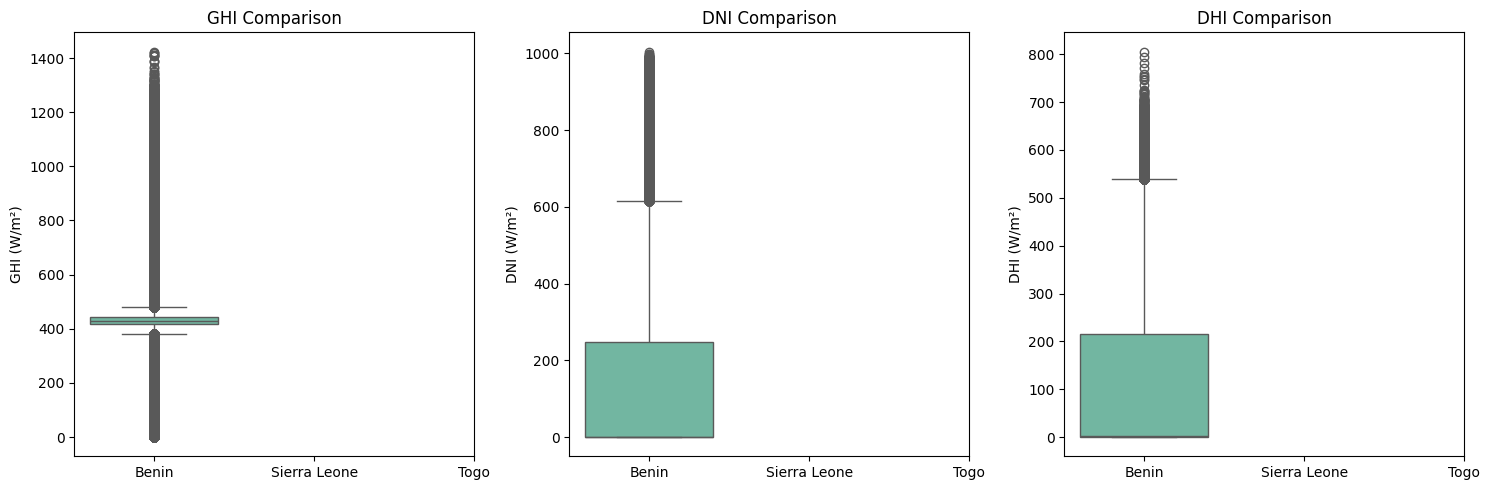

In [6]:
# metric comparison with boxplots
plt.figure(figsize=(15, 5)) # Better for side by side comparison 
plt.subplot(1, 3, 1)
sns.boxplot(data=[df_bn['GHI'], df_sl['GHI'], df_tg['GHI']], palette='Set2') # using seaborn library create boxplot.
plt.title('GHI Comparison')
plt.xticks([0, 1, 2], ['Benin', 'Sierra Leone', 'Togo'])
plt.ylabel('GHI (W/m²)')

# DNI comparison
 # Second subplot
plt.subplot(1, 3, 2)
sns.boxplot(data=[df_bn['DNI'], df_sl['DNI'], df_tg['DNI']], palette='Set2') # using seaborn library create boxplot.
plt.title('DNI Comparison')
plt.xticks([0, 1, 2], ['Benin', 'Sierra Leone', 'Togo'])
plt.ylabel('DNI (W/m²)')

# DHI comparison
# third subplot
plt.subplot(1, 3, 3)
sns.boxplot(data=[df_bn['DHI'], df_sl['DHI'], df_tg['DHI']], palette='Set2')
plt.title('DHI Comparison')
plt.xticks([0, 1, 2], ['Benin', 'Sierra Leone', 'Togo'])
plt.ylabel('DHI (W/m²)')
plt.tight_layout()
plt.show()

**2.2 Summary Table comparing across countries**

In [7]:
summary_data ={
    'Country': ['Benin', 'Sierra Leone', 'Togo'],
    'GHI Mean': [df_bn['GHI'].mean(), df_sl['GHI'].mean(), df_tg['GHI'].mean()],
    'GHI Median': [df_bn['GHI'].median(), df_sl['GHI'].median(), df_tg['GHI'].median()],
    'GHI Std Dev': [df_bn['GHI'].std(), df_sl['GHI'].std(), df_tg['GHI'].std()],
    'DNI Mean': [df_bn['DNI'].mean(), df_sl['DNI'].mean(), df_tg['DNI'].mean()],
    'DNI Median': [df_bn['DNI'].median(), df_sl['DNI'].median(), df_tg['DNI'].median()],
    'DNI Std Dev': [df_bn['DNI'].std(), df_sl['DNI'].std(), df_tg['DNI'].std()],
    'DHI Mean': [df_bn['DHI'].mean(), df_sl['DHI'].mean(), df_tg['DHI'].mean()],
    'DHI Median': [df_bn['DHI'].median(), df_sl['DHI'].median(), df_tg['DHI'].median()],
    'DHI Std Dev': [df_bn['DHI'].std(), df_sl['DHI'].std(), df_tg['DHI'].std()]
}
summary_table =pd.DataFrame(summary_data)
print("\nSummary Table:")
print(summary_table)


Summary Table:
        Country    GHI Mean  GHI Median  GHI Std Dev    DNI Mean  DNI Median  \
0         Benin  475.492396       474.2   228.385103  348.965279       345.7   
1  Sierra Leone  383.017951       359.5   217.653053  174.952927       115.3   
2          Togo  442.435615       430.3   228.257286  151.258469         0.0   

   DNI Std Dev    DHI Mean  DHI Median  DHI Std Dev  
0   193.441746  222.224081       213.4   107.493717  
1   193.599354  228.914088       225.0   105.439689  
2   250.956962  116.444352         2.5   156.520714  


# 3. Statistical Testing

**3.1 ANOVA**

In [ ]:
# Statistical Testing (ANOVA)
fvalue, pvalue = stats.f_oneway(df_bn['GHI'], df_sl['GHI'], df_tg['GHI']) # using the scipy stats
print(f"\nANOVA test for GHI: F-value = {fvalue:.2f}, p-value = {pvalue:.3f}")


ANOVA test for GHI: F-value = 22833.40, p-value = 0.000
Kruskal-Wallis H-test for GHI: H-statistic = 168588.78, p-value = 0.000


**3.2 Kruskal-Wallis**

In [11]:

# Statistical Testing (Kruskal-Wallis)
# let take look at kruskal wallis for more understanding the variation of GHI.
# stats.kruskal automatically handles NaN values by default (nan_policy='propagate')
# but it's good practice to ensure the data passed is clean.
# Filter out NaN values from GHI series before passing to kruskal
ghi_benin = df_bn['GHI'].dropna()
ghi_sierra_leone = df_sl['GHI'].dropna()
ghi_togo = df_tg['GHI'].dropna()

h_statistic, pvalue_kruskal = stats.kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"Kruskal-Wallis H-test for GHI: H-statistic = {h_statistic:.2f}, p-value = {pvalue_kruskal:.3f}")

Kruskal-Wallis H-test for GHI: H-statistic = 168588.78, p-value = 0.000


# 5. Key Observation


In [12]:
key_observations_markdown = """
**Key Observations**

* **Overall Solar Potential (GHI):** Benin consistently shows the highest median GHI, indicating a generally stronger overall solar resource compared to Sierra Leone and Togo. Both ANOVA (p-value < 0.001) and Kruskal-Wallis (p-value < 0.001) tests confirm that the differences in GHI across the three countries are statistically significant.
* **Direct vs. Diffuse Irradiance:** Benin also stands out with significantly higher Direct Normal Irradiance (DNI), suggesting more frequent clear skies. In contrast, Togo exhibits very low median DNI and DHI, implying that both direct and diffuse solar radiation are often limited, making its solar resource potentially more challenging despite occasional high peaks.
* **Variability:** While Benin generally has higher solar potential, all three countries exhibit considerable variability in GHI, DNI, and DHI, as evidenced by the wide spread in their box plots and relatively high standard deviations. This highlights the dynamic nature of solar resources and the importance of considering variability for reliable solar energy systems.
"""
print("\n" + key_observations_markdown)



**Key Observations**

* **Overall Solar Potential (GHI):** Benin consistently shows the highest median GHI, indicating a generally stronger overall solar resource compared to Sierra Leone and Togo. Both ANOVA (p-value < 0.001) and Kruskal-Wallis (p-value < 0.001) tests confirm that the differences in GHI across the three countries are statistically significant.
* **Direct vs. Diffuse Irradiance:** Benin also stands out with significantly higher Direct Normal Irradiance (DNI), suggesting more frequent clear skies. In contrast, Togo exhibits very low median DNI and DHI, implying that both direct and diffuse solar radiation are often limited, making its solar resource potentially more challenging despite occasional high peaks.
* **Variability:** While Benin generally has higher solar potential, all three countries exhibit considerable variability in GHI, DNI, and DHI, as evidenced by the wide spread in their box plots and relatively high standard deviations. This highlights the dynamic 

# 6 Visual Summary A Bar chart Ranking

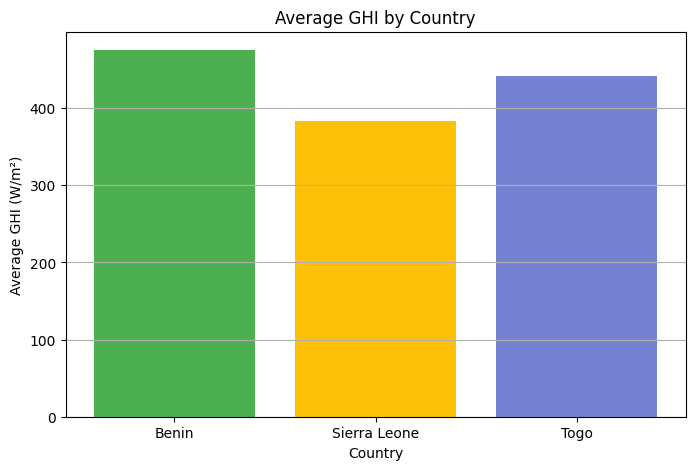

In [14]:

#  Bar chart ranking countries by average GHI
plt.figure(figsize=(8, 5))
countries = ['Benin', 'Sierra Leone', 'Togo']
avg_ghi = [df_bn['GHI'].mean(), df_sl['GHI'].mean(), df_tg['GHI'].mean()]
plt.bar(countries, avg_ghi, color=['#4CAF50', '#FFC107', "#7482D1"])  # Example colors
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Country')
plt.grid(axis='y')
plt.show()
